# Introduction

## What is Churn

Customer churn is the percentage of customers who stop using a company's products or services within a specific period. It's a measure of customer satisfaction and loyalty.

Impact: High churn indicates dissatisfied customers, leading to lost revenue and increased costs to acquire new customers.

Prevention: Reducing churn helps retain customers, saving time and money while boosting revenue.


## Customer Churn Analysis Summary


As we embark on this journey of analyzing customer churn, let's think of our dataset as a blank canvas, 
where every row tells a story and every column adds color to our masterpiece of insights.
Together, we'll brush strokes of data preprocessing, blend in model training, and paint a clearer picture 
of customer behavior to reduce churn and enhance retention!

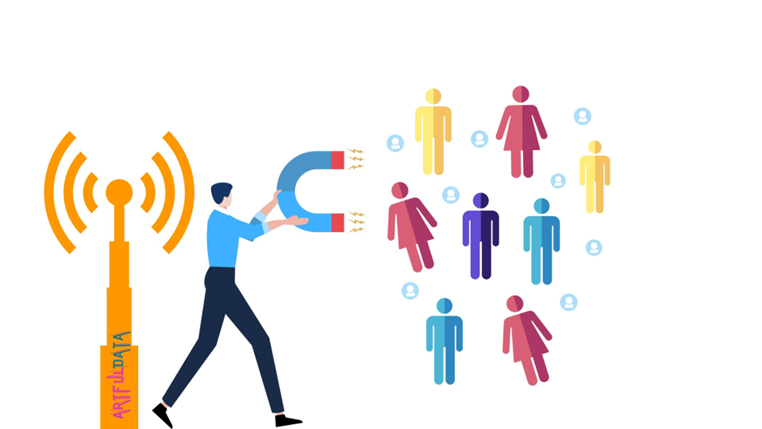

## Feature explanation

customerID : Customer ID

gender :  male or a female

SeniorCitizen : customer is a senior citizen or not (1, 0)

Partner :  a partner or not (Yes, No)

Dependents :  dependents or not (Yes, No)

tenure : Number of months the customer has stayed with the company

PhoneService : Whether the customer has a phone service or not (Yes, No)

MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService : Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract : The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)

PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges : The amount charged to the customer monthly

TotalCharges : The total amount charged to the customer

Churn : Whether the customer churned or not (Yes or No)

# load data and library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
##!pip cache purge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler



In [3]:
#loading data
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Exploratory Data Analysis (EDA) 

## Data Structure

In [4]:
#Check data type and null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [8]:
df.shape

(7043, 21)

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## Manupulate Data

In [11]:
#Total Charge should be numeric
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [12]:
# Impute based on tenur, tenure (length of time a customer has been with the company)*MonthlyCharges
df.loc[df['TotalCharges'].isna(),'TotalCharges']=df['tenure']*df['MonthlyCharges']


In [13]:
#convert to categorical Label "Senior Citizen "
df['SeniorCitizen']=df['SeniorCitizen'].map({0:'No',1:'Yes'})

In [14]:
#check again
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [15]:
df.duplicated().sum()  # Count duplicate rows


0

## Analysis features

In [16]:
Categorical =df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']]
for col in Categorical :
    print(f"value counts for {col}:")
    print (df[col].value_counts())
    print()
    

value counts for gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

value counts for SeniorCitizen:
SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

value counts for Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

value counts for Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

value counts for tenure:
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

value counts for PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

value counts for MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

value counts for InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

value counts for OnlineSecurity:
OnlineSecurity
No                     3498
Y

 # Visualizations
    Help uncover insights about customer behavior, churn, and other relationships.

## Bar Charts

### Churn Distribution

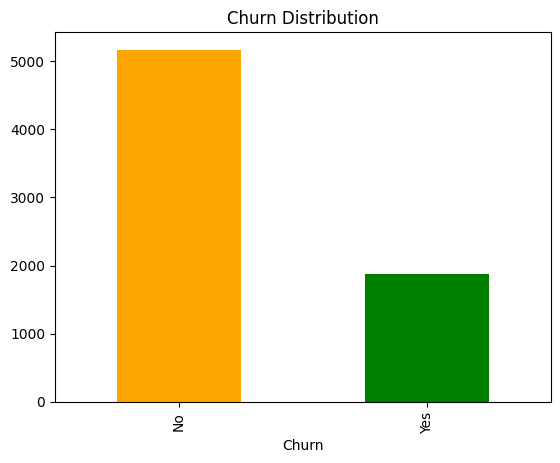

In [17]:
#Situation Churn
colors=['orange' if churn=='No'else 'green' for churn in df['Churn'].unique()]
df['Churn'].value_counts().plot(kind='bar', color=colors)  

plt.title('Churn Distribution')
plt.show()

### Contract Distribution

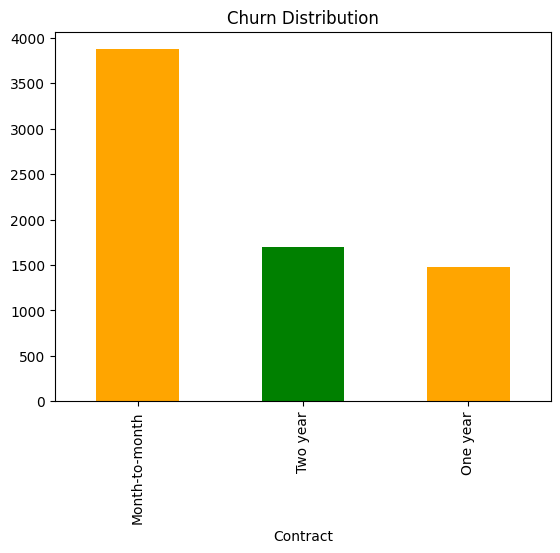

In [18]:
#Situation Churn

df['Contract'].value_counts().plot(kind='bar', color=colors)  

plt.title('Churn Distribution')
plt.show()

### Customer Contract Distribution by Churn

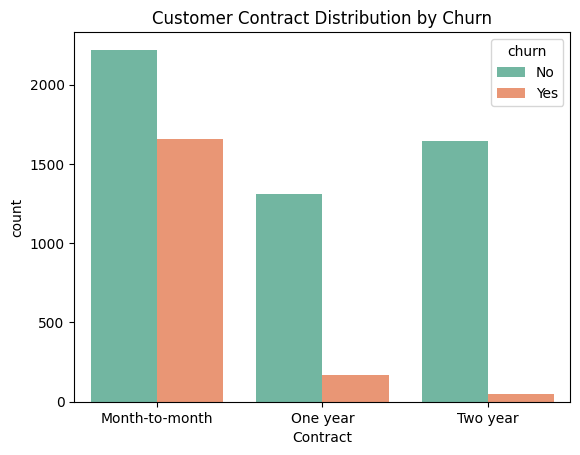

In [19]:
 #Customer Contract Distribution by Churn
sns.countplot(data=df, x='Contract', hue ='Churn', palette ='Set2')
plt.title('Customer Contract Distribution by Churn')
plt.legend(title='churn', loc='upper right')
plt.show()

### Gender by Internet Service

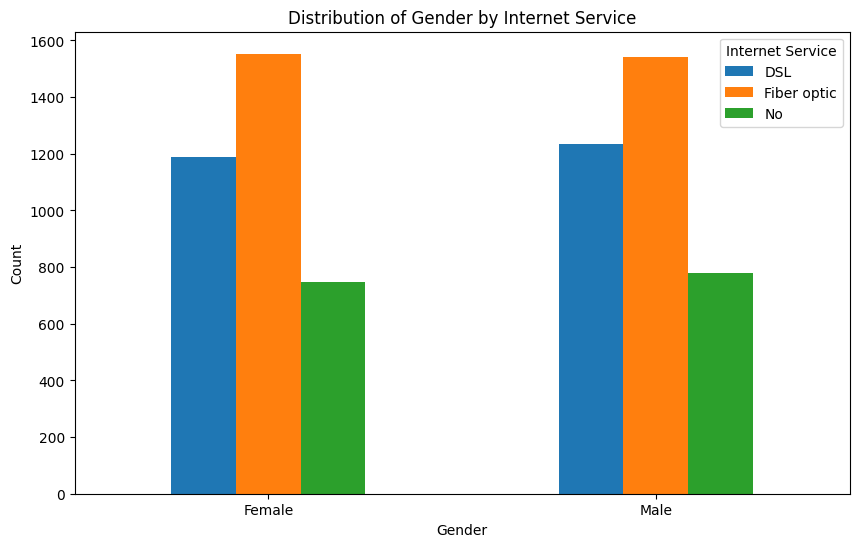

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Relation gender and InternetService
counts = df.groupby(['gender', 'InternetService']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
counts.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Distribution of Gender by Internet Service')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Internet Service', loc='upper right')

# Show the plot
plt.show()



##  Stacked Bar Charts

### Payment methods by churn

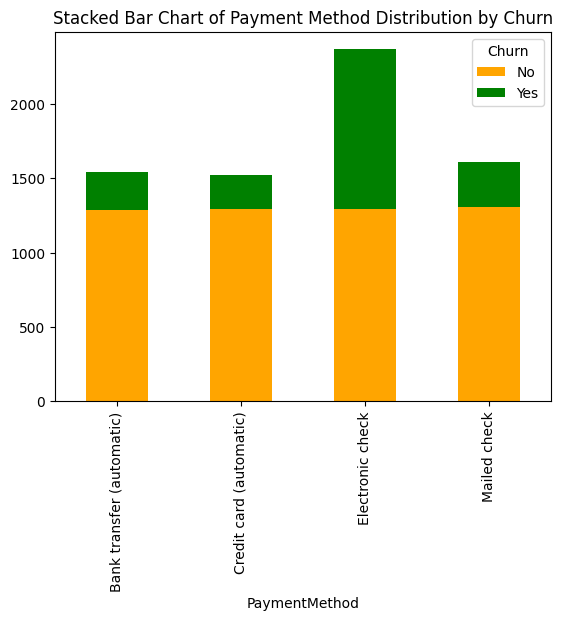

In [21]:
#  payment methods by churn
payment_churn_counts = df.groupby(['PaymentMethod', 'Churn']).size().unstack()

# Plotting the stacked bar chart
payment_churn_counts.plot(kind='bar', stacked=True, color=['orange', 'green'])

# Add labels and title
plt.title('Stacked Bar Chart of Payment Method Distribution by Churn')

plt.legend(title='Churn', labels=['No', 'Yes'], loc='upper right')

# Show the plot
plt.show()

### Partner by churn

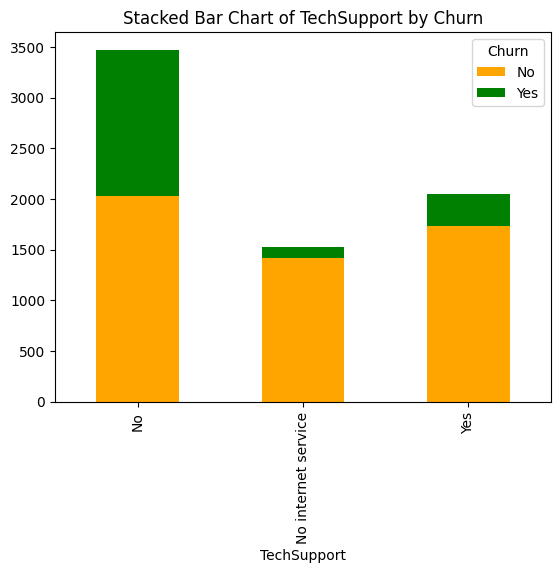

In [22]:
#  Partner by churn
TechSupport_churn_counts = df.groupby(['TechSupport', 'Churn']).size().unstack()

# Plotting the stacked bar chart
TechSupport_churn_counts.plot(kind='bar', stacked=True, color=['orange', 'green'])

# Add labels and title
plt.title('Stacked Bar Chart of TechSupport by Churn')

plt.legend(title='Churn', labels=['No', 'Yes'], loc='upper right')

# Show the plot
plt.show()

### Churn by Tenure

In [23]:
def tenure_group(tenure):
    if tenure <= 12:
        return '0-12 months'
    elif tenure <= 24:
        return '13-24 months'
    elif tenure <= 36:
        return '25-36 months'
    elif tenure <= 48:
        return '37-48 months'
    elif tenure <= 60:
        return '49-60 months'
    else:
        return '60+ months'
    
#apply function to create new column
df['tenure_group']=df['tenure'].apply(tenure_group)

In [24]:
print(df['tenure_group'].value_counts())

tenure_group
0-12 months     2186
60+ months      1407
13-24 months    1024
25-36 months     832
49-60 months     832
37-48 months     762
Name: count, dtype: int64


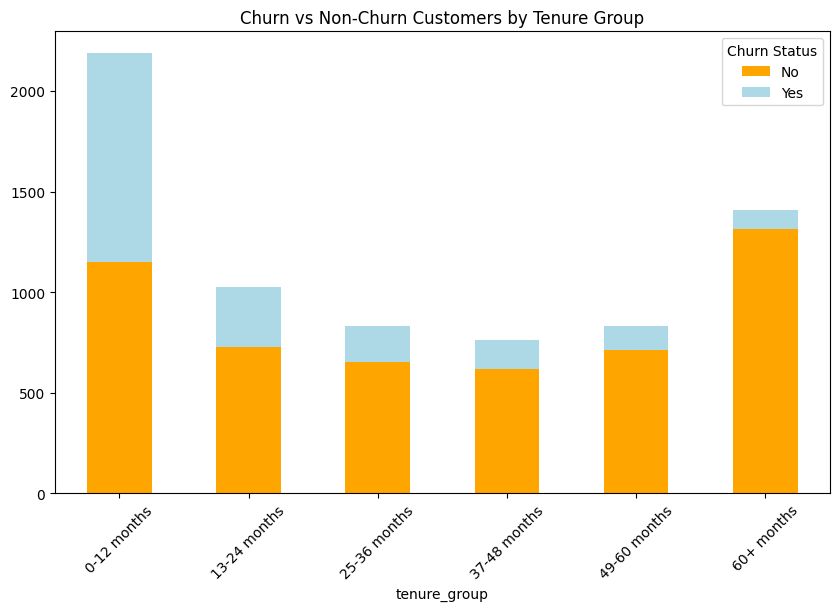

In [25]:
# Count churn and non-churn customers by tenure group
grouped = df.groupby(['tenure_group', 'Churn']).size().unstack()

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10,6), color=['orange', 'lightblue'])

# Add title and labels
plt.title('Churn vs Non-Churn Customers by Tenure Group')
plt.xticks(rotation=45)
plt.legend(title='Churn Status')
plt.show()


## Pie Chart

### payment method Distrbution 

Text(0.5, 1.0, 'Payment Method Distribution')

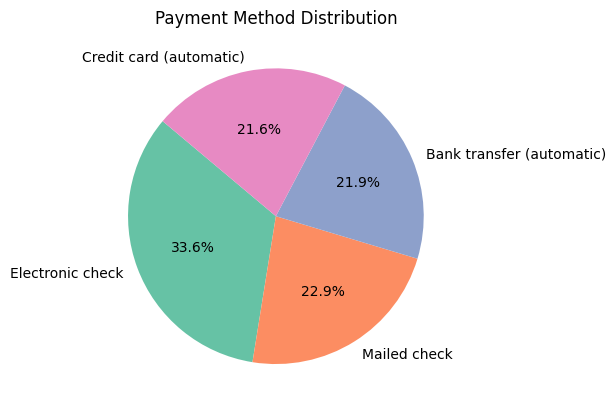

In [26]:
#payment method Distrbution 
payment_distribution = df['PaymentMethod'].value_counts()
plt.pie(payment_distribution, labels=payment_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))

# Add a title
plt.title('Payment Method Distribution')

### Gender Distrbution

Text(0.5, 1.0, 'Gender Distribution')

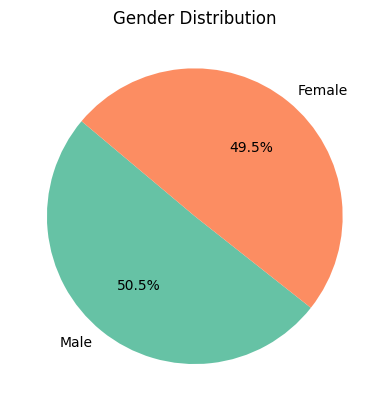

In [27]:
#Gender Distrbution 

gender_distribution = df['gender'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))

# Add a title
plt.title('Gender Distribution')

## Box plot

### MonthlyCharges Across Churn

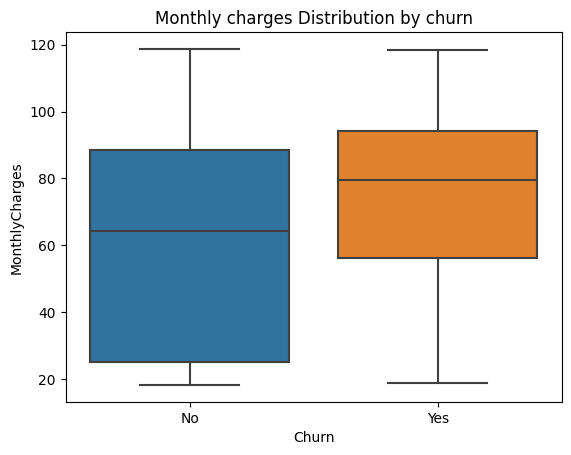

In [28]:
sns.boxplot(x='Churn',y='MonthlyCharges', data=df)
plt.title('Monthly charges Distribution by churn')
plt.show()

### TotalCharges Across InternetService

Text(0.5, 1.0, 'Total Charges Distribution by Internet Service Type')

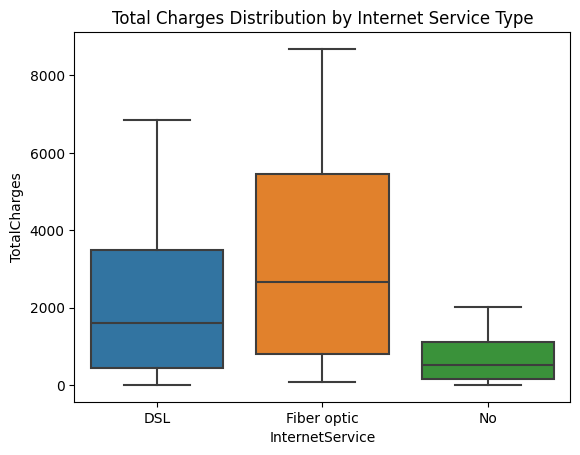

In [29]:
sns.boxplot(x='InternetService', y='TotalCharges',data=df)
plt.title('Total Charges Distribution by Internet Service Type')

The box plots help show the variability of charges within each service type. Fiber optic customers have a wider range of total charges, suggesting more diverse billing patterns, possibly due to different service packages.

## Violin Plots

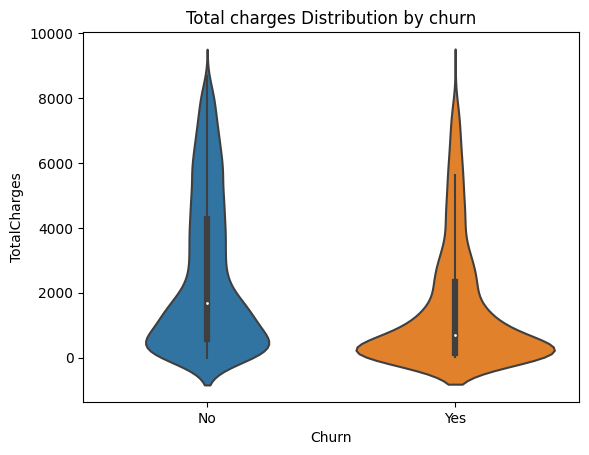

In [30]:
sns.violinplot(x='Churn',y='TotalCharges', data=df)
plt.title('Total charges Distribution by churn')
plt.show()

Customers with lower total charges seem more likely to churn, as the density in the orange violin plot is concentrated toward the lower end.
Non-churned customers exhibit a wider range of total charges, indicating that customers with higher total charges are more likely to stay.

## Heatmaps

<Axes: >

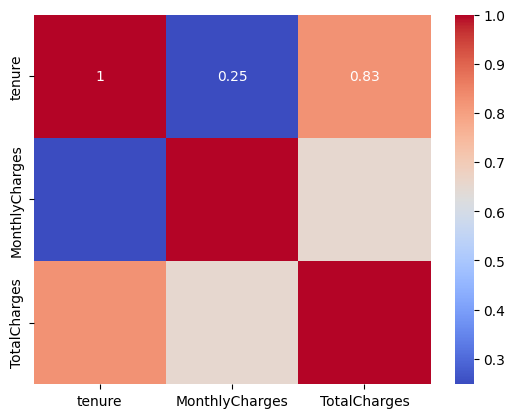

In [31]:
## Correlation Analysis

corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

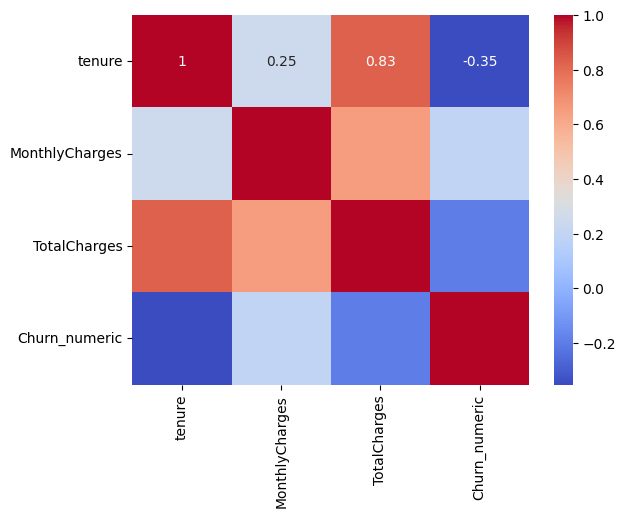

In [32]:
##To understand effect on Churn
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_numeric']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


## Scatter Plot of Monthly Charges vs Total Charges

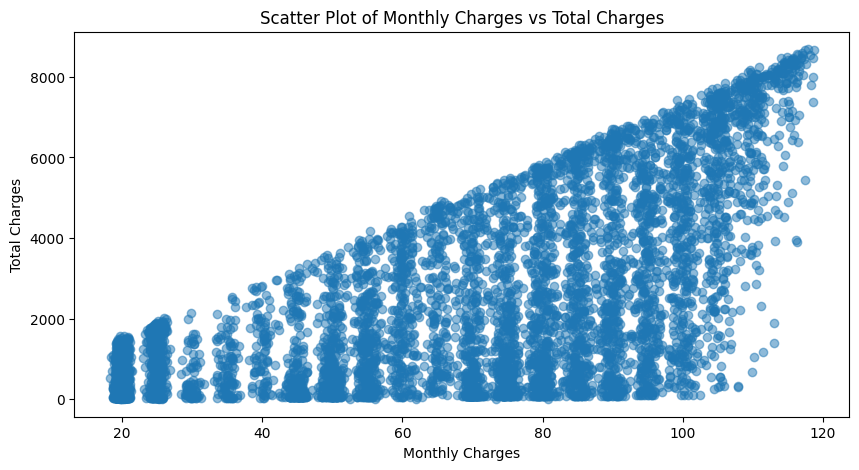

In [33]:
# Scatter plot to visualize MonthlyCharges vs TotalCharges to fnd out outlier
plt.figure(figsize=(10, 5))
plt.scatter(df['MonthlyCharges'], df['TotalCharges'], alpha=0.5)
plt.title('Scatter Plot of Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


## Histogram MonthlyCharges ِDistribution

<Axes: ylabel='Frequency'>

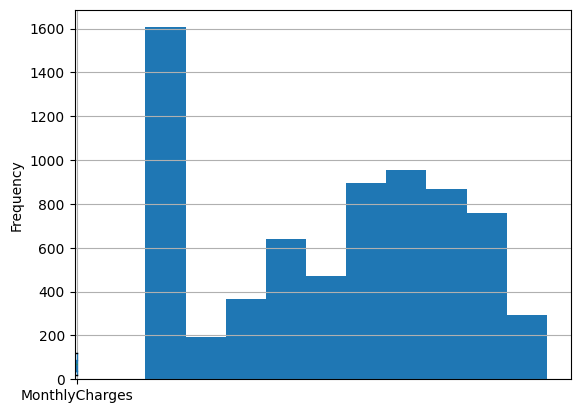

In [34]:
# Situation MonthlyCharges
df['MonthlyCharges'].plot(kind='hist')  
df.boxplot(column='MonthlyCharges')


# Feature Selection

In [35]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group', 'Churn_numeric'],
      dtype='object')

In [36]:
#  Remove the target variable 'Churn'
y = df['Churn']
X = df.drop(['Churn','customerID'], axis=1)

In [37]:
# Convert categorical variables to dummy/indicator variables
X_dummies = pd.get_dummies(X, drop_first=True)


In [38]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=42)

In [39]:
#train random forest model

model= RandomForestClassifier(random_state=42)

model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [40]:
#Feature selection using feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

                                  Feature  Importance
3                           Churn_numeric    0.728251
0                                  tenure    0.053654
2                            TotalCharges    0.034310
1                          MonthlyCharges    0.027525
11            InternetService_Fiber optic    0.023115
26                      Contract_Two year    0.020931
29         PaymentMethod_Electronic check    0.017865
35                tenure_group_60+ months    0.008228
25                      Contract_One year    0.008017
20                        TechSupport_Yes    0.007740
14                     OnlineSecurity_Yes    0.006860
27                   PaperlessBilling_Yes    0.005419
17   DeviceProtection_No internet service    0.003986
23    StreamingMovies_No internet service    0.003557
19        TechSupport_No internet service    0.003217
7                          Dependents_Yes    0.003213
21        StreamingTV_No internet service    0.003203
6                           

Churn Numerci as I creaded by myself to check correlation we shouldnt consider!

In [41]:
correlation = df[['MonthlyCharges', 'TotalCharges']].corr()
print(correlation)


                MonthlyCharges  TotalCharges
MonthlyCharges        1.000000      0.651174
TotalCharges          0.651174      1.000000


# Model selection

## Convert 'Churn' to numeric values

In [42]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [43]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group', 'Churn_numeric'],
      dtype='object')

## One-Hot Encoding for Categorical

In [44]:
df_encoder = df.drop(['Churn', 'customerID','Churn_numeric','tenure_group'], axis=1)


In [45]:
df_encoder.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [46]:
# Select categorical columns
categorical_columns = df_encoder.select_dtypes(include=['object', 'bool']).columns

In [47]:
# Initialize OneHotEncoder drop='first' to avoid dummy variable trap
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [48]:
# Fit the encoder and transform the categorical columns
encoded_categorical_data = encoder.fit_transform(df_encoder[categorical_columns])

In [49]:
# Convert the encoded data back into a DataFrame
encoded_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_columns))


In [50]:
# Now, drop the original categorical columns from df_encoder
df_encoded = df_encoder.drop(categorical_columns, axis=1)

In [51]:

# Concatenate the one-hot encoded columns with the numerical columns
final_df = pd.concat([df_encoded.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [52]:
final_df.head(5)

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,34,56.95,1889.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,53.85,108.15,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,45,42.30,1840.75,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,70.70,151.65,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Define Target value

In [53]:
X = final_df
y = df['Churn']


## Train Test Split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
X_train

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3738,35,49.20,1701.65,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3151,15,75.10,1151.55,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4860,13,40.55,590.35,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3867,26,73.50,1905.70,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3810,1,44.55,44.55,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,71,109.25,7707.70,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6227,2,46.05,80.35,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4673,25,102.80,2660.20,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2710,24,20.40,482.80,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Define model

In [56]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
  
}


## evaluating model with cross validation


In [57]:
results = {}
# Initialize the scaler
scaler = StandardScaler()
# Dictionary to store results
results = {}

for model_name, model in models.items():
    # Scale the training data
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    results[model_name] = cv_scores.mean()  # Store the mean accuracy

# Create a DataFrame to display the results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Cross-Validated Accuracy'])
print(results_df)

                 Model  Cross-Validated Accuracy
0  Logistic Regression                  0.804400
1        Random Forest                  0.787893
2    Gradient Boosting                  0.799074
3                  SVM                  0.804045
4                  KNN                  0.762510


Logistic Regression and SVM have the highest accuracy, both around 80%. This indicates they are performing well on your dataset.

# prediction by Logestic Regression

In [58]:
X = final_df  
y = df['Churn']

## Preprocessing and Split Data

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

##  Train the Logistic Regression Model

In [61]:
# Initialize and fit the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter if you get convergence warnings
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

## Evaluate the Model

In [62]:
# Predictions
y_pred = logistic_model.predict(X_test_scaled)

In [63]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8204


In [64]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[934 102]
 [151 222]]


In [65]:
# Classification Report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



## Interpret the result

### Confusion Matrix

Breakdown of the Confusion Matrix
True Negatives (TN): 934
The model correctly predicted no churn for 934 customers.

False Positives (FP): 102
The model incorrectly predicted churn for 102 customers who did not actually churn.

False Negatives (FN): 151
The model incorrectly predicted no churn for 151 customers who actually churned.

True Positives (TP): 222
The model correctly predicted churn for 222 customers.

### Accuracy

Accuracy means : TP+TN / TP+TN+FP+FN
Means 934 + 222}/{934 + 222 + 102 + 151} = 0.8044 :-D

### Percision 

Percison means  proportion of positive identifications that were actually correct. : TP/ TP+TF , 222/222+151 = 0.685

### Recal.Sensitivity

Recal means propotion of actual positives were identified correctltly: TP/TF+FN =222/222+151 =-0.596

### F1 Score

 means harmonic mean of precision and recal, balancing two metrics 
2x [(PrecisionxRecall)/(Precision +Recall)] =0.634

### Specificity


Specificity means proportion of actual negatives that were identified correctly. TN(TN+FP)= 934(934+161)=0.861

In [66]:
# Feature coefficients
importance = logistic_model.coef_[0]
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': importance})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)


                                  Feature  Coefficient
2                            TotalCharges     0.649427
10            InternetService_Fiber optic     0.619853
23                    StreamingMovies_Yes     0.228714
21                        StreamingTV_Yes     0.179380
9                       MultipleLines_Yes     0.168199
26                   PaperlessBilling_Yes     0.163829
28         PaymentMethod_Electronic check     0.150618
4                       SeniorCitizen_Yes     0.058854
8          MultipleLines_No phone service     0.035633
17                   DeviceProtection_Yes     0.027786
5                             Partner_Yes     0.027078
29             PaymentMethod_Mailed check    -0.014680
3                             gender_Male    -0.025516
7                        PhoneService_Yes    -0.035633
27  PaymentMethod_Credit card (automatic)    -0.037216
15                       OnlineBackup_Yes    -0.045178
6                          Dependents_Yes    -0.072699
16   Devic

# If you enjoyed the code or found it useful, hit that upvote button! 🚀 It's the ultimate fuel for my coding journey (and maybe some extra coffee ☕)! Happy coding! 😄